<a href="https://colab.research.google.com/github/Ar-Anik/Machine_Learning/blob/main/Adaptive_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

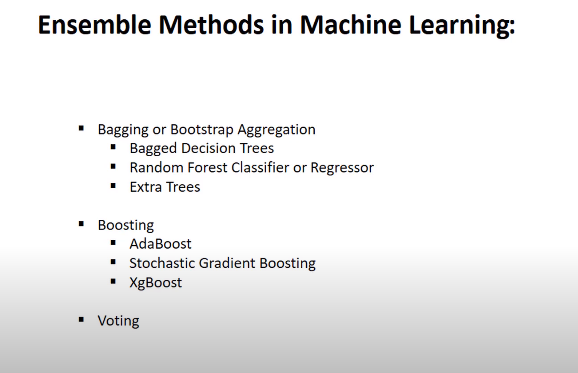

[অ্যাডাপ্টিভ বুস্টিং](https://datasinsightsbd.gitbook.io/dsbook/supervised-ml/ada-boost)

[AdaBoost](https://en.wikipedia.org/wiki/AdaBoost)

[AdaBoost](https://xavierbourretsicotte.github.io/AdaBoost.html)

A statistical model is said to be overfitted, when we train it with a lot of data (just like fitting ourselves in oversized pants!). When a model gets trained with so much of data, it starts learning from the noise and inaccurate data entries in our data set. Then the model does not categorize the data correctly, because of too many details and noise. The causes of overfitting are the non-parametric and non-linear methods because these types of machine learning algorithms have more freedom in building the model based on the dataset and therefore they can really build unrealistic models.

In [ ]:
import pandas
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data = pandas.DataFrame(iris.data, columns=iris.feature_names)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data['species'] = iris.target

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
data['species'] = data['species'].replace(to_replace = [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])
 
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# split dataset

from sklearn.model_selection import train_test_split

x = data.drop(['species'], axis='columns')
y = data.species

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
len(x_train)

120

In [ ]:
len(x_test)

30

In [ ]:
len(y_train)

120

In [ ]:
len(y_test)

30

In [26]:
# AdaBoostClassifier Model Create

from sklearn.ensemble import AdaBoostClassifier

In [27]:
AdaModel = AdaBoostClassifier()

In [28]:
# Train Our Model

AdaModel.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
# accuracy check

AdaModel.score(x_test, y_test)

0.9666666666666667

In [ ]:
# classification report

from sklearn.metrics import classification_report

y_predicted = AdaModel.predict(x_test)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.89      0.94         9
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [24]:
# Plot feature importance

AdaModel.feature_importances_

array([0.  , 0.  , 0.48, 0.52])

In [ ]:
# Now Tunning Our model by change learning rate
# learning_rate = [The LearnRate option in AdaBoostM tells about the learning rate of shrinkage 
#    which is essentially the shrink in contribution of each new base-model learned in the ensemble. 
#    This parameter controls how much the new model contributes to existing one. 
#    Normally if the LearnRate is too small it will require more iterations to get trained and will be more accurate.]

AdaModel = AdaBoostClassifier(learning_rate = 1.5)

AdaModel.fit(x_train, y_train)

AdaModel.score(x_test, y_test)

0.8666666666666667

In [29]:
AdaModel = AdaBoostClassifier(learning_rate = 2.0)

AdaModel.fit(x_train, y_train)

AdaModel.score(x_test, y_test)

0.7

In [ ]:
# n_estimator = tree number
# By default its number is 50

AdaModel = AdaBoostClassifier(n_estimators=100)

AdaModel.fit(x_train, y_train)

AdaModel.score(x_test, y_test)

0.8666666666666667

In [ ]:
AdaModel = AdaBoostClassifier(n_estimators=150)

AdaModel.fit(x_train, y_train)

AdaModel.score(x_test, y_test)

0.9333333333333333

In [ ]:
AdaModel = AdaBoostClassifier(n_estimators=200)

AdaModel.fit(x_train, y_train)

AdaModel.score(x_test, y_test)

0.8666666666666667

In [ ]:
AdaModel = AdaBoostClassifier(n_estimators=300)

AdaModel.fit(x_train, y_train)

AdaModel.score(x_test, y_test)

0.8666666666666667